#2017 Dataset

Mounting Google Drive, where the dataset is stored

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing libraries and dataset

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


data = pd.read_csv (r'/content/drive/MyDrive/district_level_mapping_2017.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


#1. Overview of the dataset

In [3]:
data.head()

,Division Code,Division Description,Treasury Code,Treasury,Grant Number,Grant Head Description,Major Head Code,Major Head Description,Scheme Code,Scheme Code Description,Standard Object Code,Standard Object Description,Plan / Non-Plan,Voted / Charged,fiscal_year,Progressive Allotment,Actual Progressive Expenditure upto month (October),Provisional Current Month Expenditure(November),Total Expenditure Upto Month (November),% A/E
0,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,1,वेतन,N,V,2017-2018,6018883.0,5438225.0,0,5438225.0,90.35
1,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,3,मंहगाई भत्ता,N,V,2017-2018,150000.0,344832.0,0,344832.0,229.89
2,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,4,यात्रा व्यय,N,V,2017-2018,35000.0,17045.0,0,17045.0,48.70
3,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,5,स्थानान्तरण यात्रा व्यय,N,V,2017-2018,16949.0,0.0,0,0.0,0.00
4,800.0,AGRA,8.0,AGRA,1,आबकारी विभाग,2039,राज्य उत्पाद शुल्क,2039000010300,अधीक्षण,6,अन्य भत्ते,N,V,2017-2018,250000.0,336648.0,0,336648.0,134.66


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375136 entries, 0 to 375135
Data columns (total 20 columns):
 #   Column                                               Non-Null Count   Dtype  
---  ------                                               --------------   -----  
 0   Division Code                                        374488 non-null  float64
 1   Division Description                                 374488 non-null  object 
 2   Treasury Code                                        374488 non-null  float64
 3   Treasury                                             375136 non-null  object 
 4   Grant Number                                         375136 non-null  object 
 5   Grant Head Description                               375136 non-null  object 
 6   Major Head Code                                      375136 non-null  int64  
 7   Major Head Description                               372904 non-null  object 
 8   Scheme Code                                          3

In [5]:
data.isnull().sum()

Division Code                                           648
Division Description                                    648
Treasury Code                                           648
Treasury                                                  0
Grant Number                                              0
Grant Head Description                                    0
Major Head Code                                           0
Major Head Description                                 2232
Scheme Code                                               0
Scheme Code Description                                   0
Standard Object Code                                      0
Standard Object Description                               0
Plan / Non-Plan                                           0
Voted / Charged                                           0
fiscal_year                                               0
Progressive Allotment                                     0
Actual Progressive Expenditure upto mont

Assuming the fact that school education does not include  University and Higher Education, Adult education and Language Development.




#2. Filtering Data with respect to School Eucation

Identifying the different Grant Heads

In [6]:
data['Grant Head Description'].unique()

array(['आबकारी विभाग', 'आवास विभाग',
       'उद्योग विभाग (लघु उद्योग एवं निर्यात प्रोत्साहन)',
       'उद्योग विभाग (खानें और खनिज)',
       'उद्योग विभाग (खादी एवं ग्रामोद्योग)',
       'उद्योग विभाग (हथकरघा उद्योग)',
       'उद्योग विभाग (भारी एवं मध्यम उद्योग)',
       'उद्योग विभाग (मुद्रण तथा लेखन सामग्री )', 'ऊर्जा विभाग',
       'कृषि तथा अन्य सम्बद्ध विभाग (औद्यानिक एवं रेशम विकास)',
       'कृषि तथा अन्य सम्बद्ध विभाग (कृषि)',
       'कृषि तथा अन्य सम्बद्ध विभाग (भूमि विकास एवं जल संसाधन)',
       'कृषि तथा अन्य सम्बद्ध विभाग (ग्राम्य विकास)',
       'कृषि तथा अन्य सम्बद्ध विभाग (पंचायती राज)',
       'कृषि तथा अन्य सम्बद्ध विभाग ((पशुधन)',
       'कृषि तथा अन्य सम्बद्ध विभाग (दुग्धशाला विकास)',
       'कृषि तथा अन्य सम्बद्ध विभाग (मत्स्य)',
       'कृषि तथा अन्य सम्बद्ध विभाग (सहकारिता)',
       'कार्मिक विभाग (प्रशिक्षण तथा अन्य व्यय)',
       'कार्मिक विभाग (लोक सेवा आयोग )', 'खाद्य तथा रसद विभाग',
       'खेल विभाग', 'गन्ना विकास विभाग (गन्ना)',
       'गन्ना विकास विभाग 

We will be dealing with only two Grant Heads with respect to school education that is Elementary Education and Secondary Education


*   शिक्षा विभाग (प्राथमिक शिक्षा)
*   शिक्षा विभाग (माध्यमिक शिक्षा)



In [7]:
FilteredData = data[(data['Grant Head Description'] == 'शिक्षा विभाग (माध्यमिक शिक्षा)')| (data['Grant Head Description'] == 'शिक्षा विभाग (प्राथमिक शिक्षा)')]

In [8]:
FilteredData.head()

,Division Code,Division Description,Treasury Code,Treasury,Grant Number,Grant Head Description,Major Head Code,Major Head Description,Scheme Code,Scheme Code Description,Standard Object Code,Standard Object Description,Plan / Non-Plan,Voted / Charged,fiscal_year,Progressive Allotment,Actual Progressive Expenditure upto month (October),Provisional Current Month Expenditure(November),Total Expenditure Upto Month (November),% A/E
297430,800.0,AGRA,6.0,ALIGARH,71,शिक्षा विभाग (प्राथमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,प्राथमिक विद्यालय / सहायता प्राप्त जूनियर हाई ...,33,पेंशन/आनुतोषिक /अन्य सेवानिवृत्ति हितलाभ,N,V,2017-2018,42000000.0,39002700.0,0,39002700.0,92.86
297431,2200.0,ALLAHABAD,64.0,ALLAHABAD II,71,शिक्षा विभाग (प्राथमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,प्राथमिक विद्यालय / सहायता प्राप्त जूनियर हाई ...,33,पेंशन/आनुतोषिक /अन्य सेवानिवृत्ति हितलाभ,N,V,2017-2018,17050000.0,13379551.0,0,13379551.0,78.47
297432,4900.0,FAIZABAD,74.0,AMBEDKARNAGAR,71,शिक्षा विभाग (प्राथमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,प्राथमिक विद्यालय / सहायता प्राप्त जूनियर हाई ...,33,पेंशन/आनुतोषिक /अन्य सेवानिवृत्ति हितलाभ,N,V,2017-2018,72948000.0,69626602.0,0,69626602.0,95.45
297433,2000.0,KANPUR NAGAR,81.0,AURAIYA,71,शिक्षा विभाग (प्राथमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,प्राथमिक विद्यालय / सहायता प्राप्त जूनियर हाई ...,33,पेंशन/आनुतोषिक /अन्य सेवानिवृत्ति हितलाभ,N,V,2017-2018,33000000.0,4108542.0,0,4108542.0,12.45
297434,3400.0,AZAMGARH,34.0,AZAMGARH,71,शिक्षा विभाग (प्राथमिक शिक्षा),2071,पेंशन तथा अन्य सेवा निवृत्ति हित लाभ,2071011170300,प्राथमिक विद्यालय / सहायता प्राप्त जूनियर हाई ...,33,पेंशन/आनुतोषिक /अन्य सेवानिवृत्ति हितलाभ,N,V,2017-2018,315594240.0,13827215.0,0,13827215.0,4.38


#3. Checking for Null Values in colmuns and duplicate rows

In [9]:
FilteredData.isnull().sum()

Division Code                                            0
Division Description                                     0
Treasury Code                                            0
Treasury                                                 0
Grant Number                                             0
Grant Head Description                                   0
Major Head Code                                          0
Major Head Description                                 223
Scheme Code                                              0
Scheme Code Description                                  0
Standard Object Code                                     0
Standard Object Description                              0
Plan / Non-Plan                                          0
Voted / Charged                                          0
fiscal_year                                              0
Progressive Allotment                                    0
Actual Progressive Expenditure upto month (October)     

Since there are no Null Values in Columns like Grant Number and Major Head Code which is essential for analysis we go ahead

In [10]:
FilteredData['Major Head Code'].value_counts()

2202    12869
2204     1219
2205     1019
4202      223
2071      128
Name: Major Head Code, dtype: int64

In [11]:
FilteredData.duplicated().sum()

4934

Since it is not possible to have duplicate rows with the same expenditure within the same financial year for the exact same purpose we remove such rows.

In [12]:
FilteredData.drop_duplicates(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


# 4. Visualising the Dataset

In [13]:
FilteredData.columns

Index(['Division Code', 'Division Description', 'Treasury Code', 'Treasury',
       'Grant Number', 'Grant Head Description', 'Major Head Code',
       'Major Head Description', 'Scheme Code', 'Scheme Code Description',
       'Standard Object Code', 'Standard Object Description',
       'Plan / Non-Plan', 'Voted / Charged', 'fiscal_year',
       'Progressive Allotment',
       'Actual Progressive Expenditure upto month (October)',
       'Provisional Current Month Expenditure(November)',
       'Total Expenditure Upto Month (November)', '% A/E'],
      dtype='object')

In [14]:
FilteredData[['Progressive Allotment',
       'Actual Progressive Expenditure upto month (October)',
       'Provisional Current Month Expenditure(November)',
       'Total Expenditure Upto Month (November)', '% A/E']].describe()

,Progressive Allotment,Actual Progressive Expenditure upto month (October),Provisional Current Month Expenditure(November),Total Expenditure Upto Month (November),% A/E
count,1.052400e+04,1.052400e+04,10524.0,1.052400e+04,10524.000000
mean,4.363325e+07,4.540390e+07,0.0,4.540390e+07,89.139200
std,5.087276e+08,6.151968e+08,0.0,6.151968e+08,484.163948
min,-4.000000e+07,0.000000e+00,0.0,0.000000e+00,0.000000
25%,1.500000e+03,0.000000e+00,0.0,0.000000e+00,0.000000
50%,2.431000e+04,2.200000e+04,0.0,2.200000e+04,98.060000
75%,1.033345e+06,8.560285e+05,0.0,8.560285e+05,100.000000
max,3.701705e+10,3.701705e+10,0.0,3.701705e+10,29549.300000


Since the column *Provisional Current Month Expenditure(November)* does not have any values it can be removed from the dataset

In [15]:
FilteredData.drop('Provisional Current Month Expenditure(November)', inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [16]:
import seaborn as sb

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


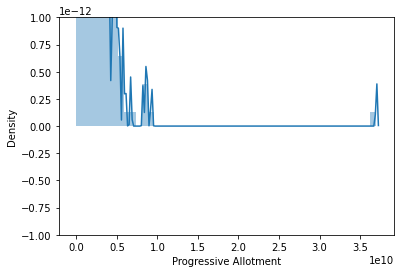

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


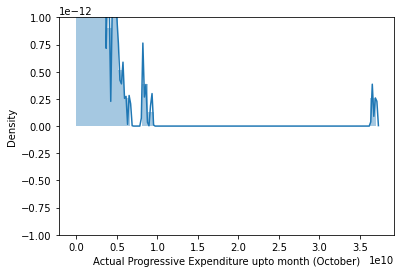

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


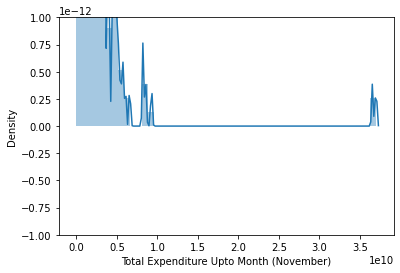

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


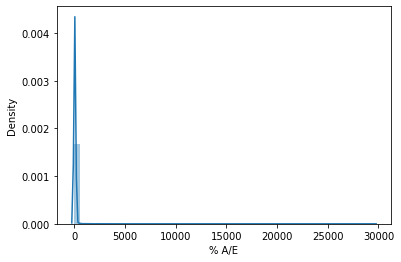

In [17]:
sb.distplot(FilteredData['Progressive Allotment'])
plt.show()
sb.distplot(FilteredData['Actual Progressive Expenditure upto month (October)'])
plt.show()
sb.distplot(FilteredData['Total Expenditure Upto Month (November)'])
plt.show()
sb.distplot(FilteredData['% A/E'])
plt.show()

We can see that the data is right skewed. 

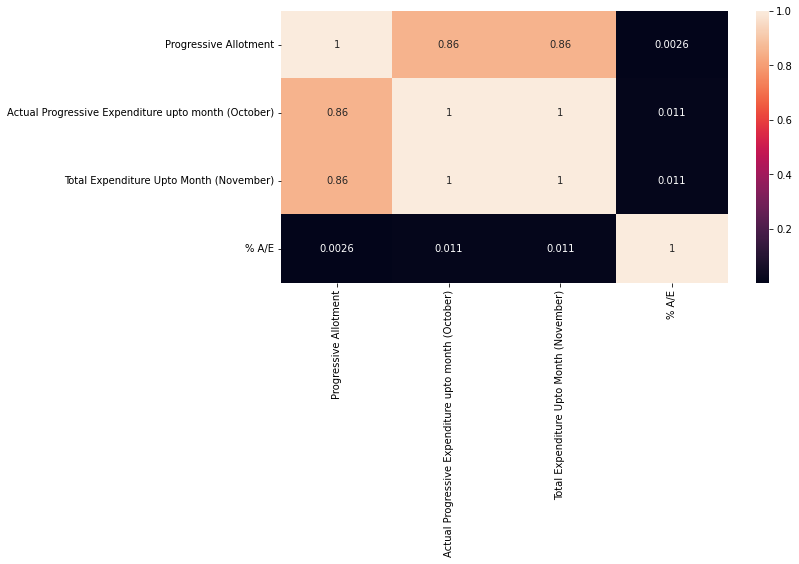

In [18]:
plt.figure (figsize=(10,5))
sb.heatmap(FilteredData[['Progressive Allotment',
       'Actual Progressive Expenditure upto month (October)',
       'Total Expenditure Upto Month (November)', '% A/E']].corr(), annot=True)
plt.show();

# Q1) Calculating the share of expenditure on school education

In [19]:
pd.DataFrame(FilteredData.groupby(['Grant Head Description','Grant Number'])['Total Expenditure Upto Month (November)'].sum())

,,Total Expenditure Upto Month (November)
Grant Head Description,Grant Number,
शिक्षा विभाग (प्राथमिक शिक्षा),71,3.934039e+11
शिक्षा विभाग (माध्यमिक शिक्षा),72,8.442678e+10


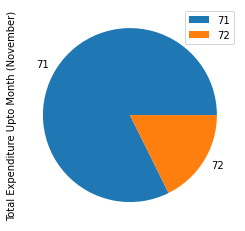

In [20]:
FilteredData.groupby(['Grant Number']).sum().plot(kind='pie', y='Total Expenditure Upto Month (November)')

# Q2) Estimating the share of capital expenditure

We know that **Major Head 4202** maps to *Capital Outlay on Education, Sports, Art and Culture*

In [21]:
Capital= FilteredData[FilteredData['Major Head Code']==4202]
pd.DataFrame(Capital['Total Expenditure Upto Month (November)'].groupby(Capital['Grant Head Description']).sum())

,Total Expenditure Upto Month (November)
Grant Head Description,
शिक्षा विभाग (प्राथमिक शिक्षा),1.880974e+09
शिक्षा विभाग (माध्यमिक शिक्षा),1.222400e+09


# Q3) Estimate the per-capita expenditure on school education in the state, and each district. 

With reference to the following [website](https://www.census2011.co.in/census/state/uttar+pradesh.html), we find the projected population for the 2021 in UP is *228,054,788*

In [22]:
percap_exp = FilteredData['Total Expenditure Upto Month (November)'].sum()/228054788
print(' The Per-capita expenditure on school education for the year 2020-21 is %.2f' %(percap_exp))

 The Per-capita expenditure on school education for the year 2020-21 is 2095.24


**Note** : Was unable to find district wise population data for the year 2019-20

#Q4) Rank the districts based on utilization of allotted funds of revenue expenditure and capital expenditure

In [23]:
cap_exp = FilteredData[FilteredData['Major Head Code'] == 4202]
rev_exp = FilteredData[FilteredData['Major Head Code'] != 4202]

Captial Expenditure

In [24]:
op = pd.DataFrame((cap_exp['Total Expenditure Upto Month (November)'].groupby(cap_exp['Treasury']).sum())/cap_exp['Progressive Allotment'].groupby(cap_exp['Treasury']).sum()).sort_values(by=0, ascending=False)
op

,0
Treasury,
AGRA,1.000000
FATEHPUR,1.000000
J.P.NAGAR,1.000000
ALIGARH,1.000000
KANPUR DEHAT,1.000000
...,...
UNNAO TREASURY,0.679920
HARDOI,0.669849
G.B.NAGAR,0.628840


In [25]:
op[0].value_counts()

1.000000    35
0.807848     1
0.941114     1
0.932631     1
0.927295     1
0.918505     1
0.913737     1
0.906714     1
0.898922     1
0.882773     1
0.803862     1
0.999915     1
0.769645     1
0.754924     1
0.743342     1
0.733204     1
0.679920     1
0.669849     1
0.628840     1
0.409217     1
0.954453     1
0.955503     1
0.969449     1
0.970909     1
0.999875     1
0.999719     1
0.999249     1
0.999080     1
0.996404     1
0.995950     1
0.994302     1
0.987368     1
0.986822     1
0.986396     1
0.984154     1
0.982099     1
0.981514     1
0.979217     1
0.978927     1
0.975116     1
0.973971     1
0.053443     1
Name: 0, dtype: int64

It was found that **35 Distrcits** utilized 100% of their allocated funds for capital expenditure



Revenue Expenditure

In [26]:
op = pd.DataFrame((rev_exp['Total Expenditure Upto Month (November)'].groupby(rev_exp['Treasury']).sum())/rev_exp['Progressive Allotment'].groupby(rev_exp['Treasury']).sum()).sort_values(by=0, ascending=False)
op

,0
Treasury,
LUCKNOW COLL.,1.591580
BADAUN,1.000077
ALIGARH,0.998512
AMBEDKARNAGAR,0.997084
HARDOI,0.996682
...,...
SIDDHARTH NAGAR,0.892566
HAPUR,0.891143
MAINPURI,0.871739


We can infer that Lucknow Coll. district ranked first in the total revenue expenditure